In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd
import numpy as np
import os, sys
import h5py

from sklearn.metrics import precision_recall_fscore_support

os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
pwd

'/home/users/cdonoso/astromer/ASTROMER/presentation/notebooks'

In [3]:
def load_embeddings(source):
    file = open(source, 'rb')
    hf = h5py.File(file)
    att = hf['att'][()]
    x = hf['x'][()]
    t = hf['t'][()]
    lc = np.concatenate([t, x], 2)
    y = hf['y'][()]
    m = 1. - hf['m'][()]
    return att, y, m, lc

In [11]:
def get_prediction(data, folder, name):
    x, y, m, lc = load_embeddings(os.path.join(data, 'test.h5'))
    
    if name == 'lstm':
        x_test = [lc, m]
        print('lstm: ',x_test[0].shape)
    if name == 'lstm_att':
        x_test = [x, m]
        print('lstm_att: ',x_test[0].shape)
    if name == 'mlp_att':
#         x_test = np.sum(x*m, 1)/tf.reduce_sum(m)
        x_test = np.mean(x, 2)
        print('mlp_att: ',x_test.shape)
        
    model = tf.keras.models.load_model(os.path.join(folder, name, 'model'))
    y_pred = model.predict(x_test)
    y_pred = tf.argmax(y_pred, 1)
    
    return y, y_pred

In [12]:
exp_name = 'alcock'

for fold_n in range(1):
    results = []
    for exp in ['{}_20'.format(exp_name), 
                '{}_50'.format(exp_name), 
                '{}_100'.format(exp_name),
                '{}_500'.format(exp_name)]:# '{}'.format(exp_name)

        for model_name in ['lstm', 'lstm_att', 'mlp_att']:
            y, y_pred = get_prediction('../../embeddings/{}/fold_{}/{}'.format(exp_name, fold_n, exp), 
                                       '../../experiments_2/{}/{}/fold_{}/'.format(exp_name, exp, fold_n), 
                                       model_name)

            prec, reca, f1, _ = precision_recall_fscore_support(y, y_pred, average='macro')

            results.append([exp, model_name, f1, prec, reca])

    df_results = pd.DataFrame(results, columns=['exp', 'model', 'f1', 'recall', 'precision'])
    df_results.to_csv('../../experiments_2/{}/results_{}.csv'.format(exp_name, fold_n), index=False)

lstm:  (50, 200, 2)


2021-11-23 17:05:36.588607: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:37.247648: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:37.567465: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:37.579851: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:37.832676: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

lstm_att:  (50, 200, 256)


/home/users/cdonoso/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2021-11-23 17:05:45.930333: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:45.942919: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:45.973659: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23

mlp_att:  (50, 200)
lstm:  (127, 200, 2)


2021-11-23 17:05:56.276335: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:58.738677: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:58.879903: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:58.892084: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:05:58.927095: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

lstm_att:  (127, 200, 256)


2021-11-23 17:06:06.513681: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:06.636377: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:06.745842: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:07.089987: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:07.352584: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

mlp_att:  (127, 200)
lstm:  (236, 200, 2)


2021-11-23 17:06:17.602259: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:17.728222: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:17.740599: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:17.806193: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:18.259147: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

lstm_att:  (236, 200, 256)


2021-11-23 17:06:29.546498: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:29.572855: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:29.823015: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:29.835209: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:29.856060: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_sh

mlp_att:  (236, 200)
lstm:  (1237, 200, 2)


2021-11-23 17:06:40.508001: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:41.061606: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:41.458483: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:42.081952: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:42.143652: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _ou

lstm_att:  (1237, 200, 256)


2021-11-23 17:06:58.529141: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:59.183321: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:59.258302: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:59.493301: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-23 17:06:59.505489: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_sh

mlp_att:  (1237, 200)


In [13]:
fold_0 = pd.read_csv('../../experiments_2/alcock/results_0.csv')
# fold_1 = pd.read_csv('../../experiments_2/alcock/results_1.csv')
# fold_2 = pd.read_csv('../../experiments_2/alcock/results_2.csv')

In [14]:
fold_0

,exp,model,f1,recall,precision
0,alcock_20,lstm,0.142512,0.113960,0.211111
1,alcock_20,lstm_att,0.515330,0.543201,0.515693
2,alcock_20,mlp_att,0.094462,0.092271,0.118326
3,alcock_50,lstm,0.218385,0.182050,0.284551
4,alcock_50,lstm_att,0.628568,0.702626,0.690097
5,alcock_50,mlp_att,0.200684,0.215566,0.213026
6,alcock_100,lstm,0.152644,0.114906,0.235139
7,alcock_100,lstm_att,0.645730,0.701321,0.660067
8,alcock_100,mlp_att,0.308685,0.357232,0.308657
9,alcock_500,lstm,0.122403,0.152362,0.236746


In [218]:
all_folds = pd.concat([fold_0[fold_0['exp']=='ogle_500'].iloc[:, 1:],
                       fold_1[fold_1['exp']=='ogle_500'].iloc[:, 1:],
                       fold_2[fold_2['exp']=='ogle_500'].iloc[:, 1:]])
all_folds_mean = all_folds.groupby('model').mean()
all_folds_std = all_folds.groupby('model').std()
all_folds_table = all_folds_mean.round(2).astype(str) + '+-' +all_folds_std.round(2).astype(str)

for k, row in all_folds_table.reset_index().iterrows():
    print(' & '.join(row.values)+' \\\ \hline')

lstm & 0.69+-0.03 & 0.72+-0.03 & 0.69+-0.04 \\ \hline
lstm_att & 0.76+-0.01 & 0.77+-0.01 & 0.76+-0.01 \\ \hline
mlp_att & 0.71+-0.01 & 0.73+-0.01 & 0.72+-0.01 \\ \hline


In [220]:
from scipy import stats

model_1 = all_folds[all_folds['model']=='lstm']['f1']
model_2 = all_folds[all_folds['model']=='lstm_att']['f1']

stats.ttest_ind(a=model_1, b=model_2, equal_var=False)

Ttest_indResult(statistic=-3.4685979786601093, pvalue=0.04710716185274757)

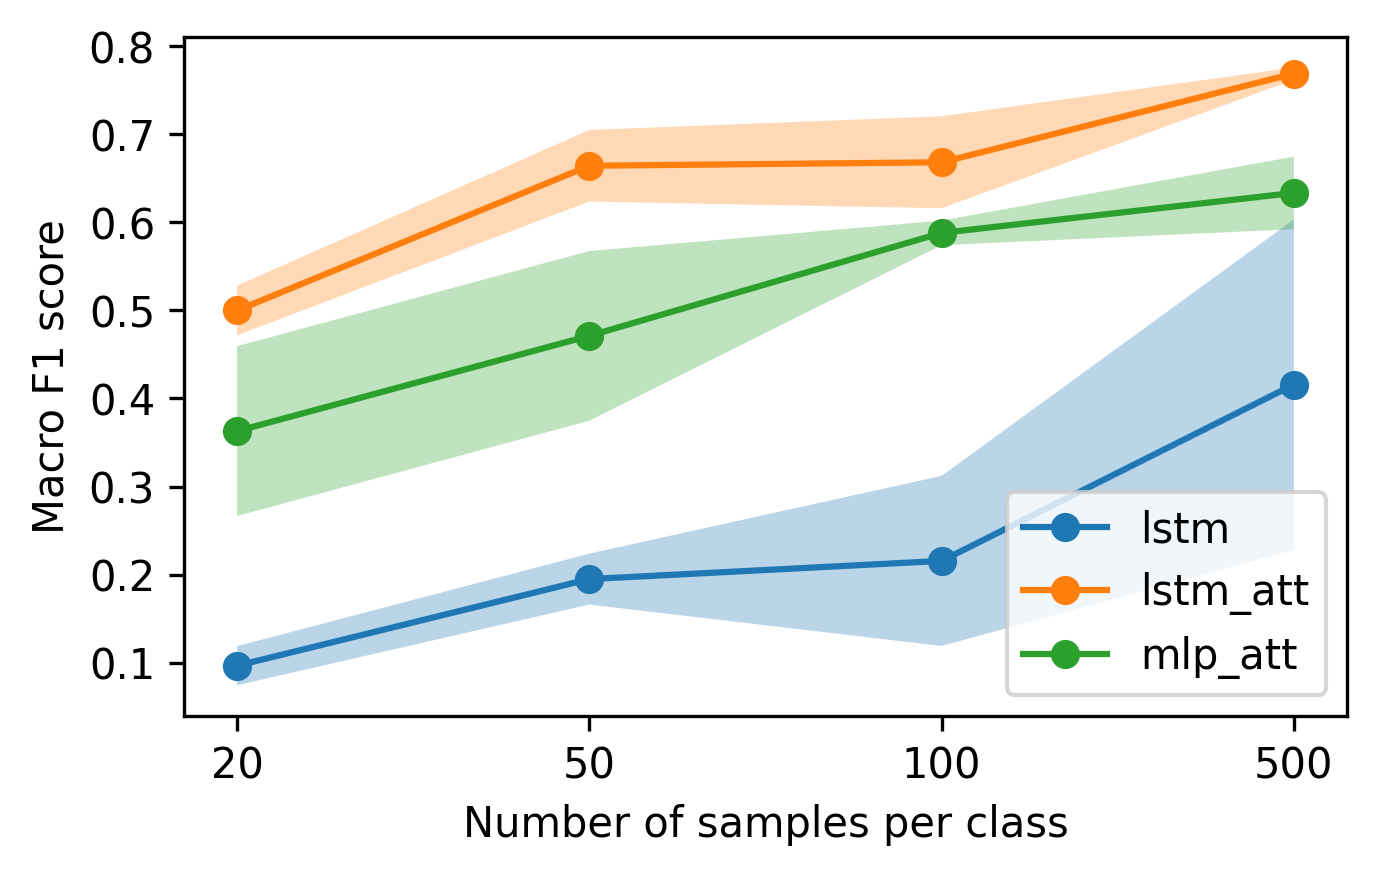

In [197]:
plt.figure(figsize=(5,3), dpi=300)
for (exp0, g0), (exp1, g1), (exp2, g2) in zip(fold_0.groupby('model'), fold_1.groupby('model'), fold_2.groupby('model')):
    
    f1_mean = np.mean([g0['f1'][:-1], g1['f1'][:-1], g2['f1'][:-1]], 0)
    f1_std = np.std([g0['f1'][:-1], g1['f1'][:-1], g2['f1'][:-1]], 0)

    xrange = range(len(g0['exp'][:-1]))    
    plt.plot(xrange, f1_mean, marker='o',label=exp0)
    plt.fill_between(xrange, f1_mean+f1_std, f1_mean-f1_std, alpha=0.3)
    plt.xticks(xrange, [x.split('_')[-1] for x in g0['exp'][:-1]])
    
plt.ylabel('Macro F1 score')
plt.xlabel('Number of samples per class')
plt.legend(loc='lower right')
plt.show()

# Learning curves

In [201]:
from tensorboard.backend.event_processing import event_accumulator
from tensorflow.core.util import event_pb2
from tensorflow.python.lib.io import tf_record
def my_summary_iterator(path):
    for r in tf_record.tf_record_iterator(path):
        yield event_pb2.Event.FromString(r)
def get_metrics(path_logs):
    train_logs = [x for x in os.listdir(path_logs) if x.endswith('.v2')][0]
    path_train = os.path.join(path_logs, train_logs)

    ea = event_accumulator.EventAccumulator(path_train)
    ea.Reload()

    metrics = {tag:[] for tag in ea.Tags()['tensors']}
    for e in my_summary_iterator(path_train):
        for v in e.summary.value:
            if v.tag == 'model': continue
            value = tf.make_ndarray(v.tensor)
            metrics[v.tag].append(value)
    return metrics

In [221]:
exp_folder = '../../experiments/ogle/ogle_500/fold_2/'

dict_keys(['epoch_loss', 'epoch_accuracy'])
dict_keys(['epoch_loss', 'epoch_accuracy'])
dict_keys(['epoch_loss', 'epoch_accuracy'])


Text(0.0, 0.5, 'Categorical Cross Entropy')

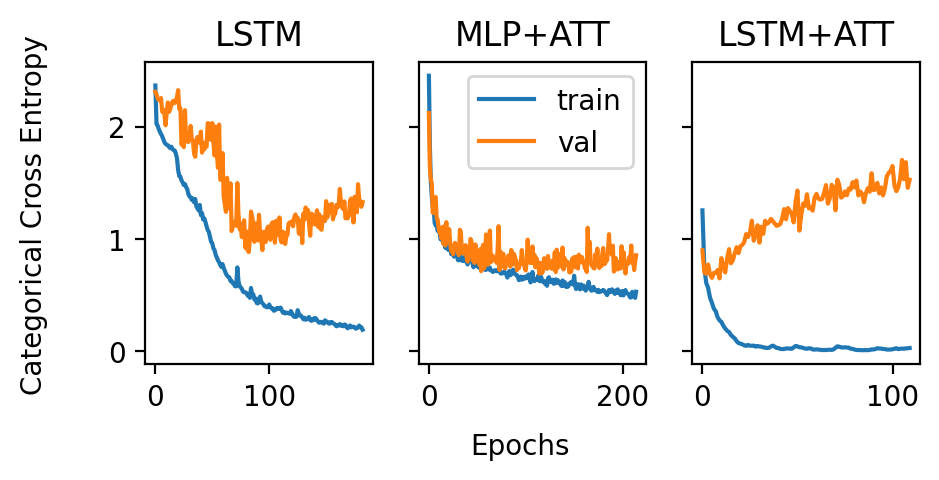

In [222]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(5,2), dpi=200, 
                         gridspec_kw={'hspace': 0.4, 'wspace': 0.2},)
for index, name in enumerate(['lstm', 'mlp_att', 'lstm_att']):
#     if name != 'lstm':continue
    val_metrics = get_metrics(os.path.join(exp_folder, name, 'logs', 'validation'))
    train_metrics = get_metrics(os.path.join(exp_folder, name, 'logs', 'train'))
    print(train_metrics.keys())
    axes[index].plot(train_metrics['epoch_loss'], label='train')
    axes[index].plot(val_metrics['evaluation_loss_vs_iterations'], label='val')
    if name =='lstm': title_name = 'LSTM'
    if name =='mlp_att': title_name = 'MLP+ATT'
    if name =='lstm_att': title_name = 'LSTM+ATT'
    axes[index].set_title(title_name)
    
#     axes[index].set_yscale('log')

axes[1].legend()
fig.text(0.5, -0.1, 'Epochs', ha='center')
fig.text(0.0, 0.5, 'Categorical Cross Entropy', va='center', rotation='vertical')